In [1]:
import pandas as pd 
import numpy as np

In [2]:
toy_df = pd.read_csv('./decision_tree.csv', sep=',')
print ("dataset: \n", toy_df.head(14))

dataset: 
     Day    Outlook  Temperature  Humidity     Wind  PlayTennis
0    D1      Sunny          Hot      High     Weak          No
1    D2      Sunny          Hot      High   Strong          No
2    D3   Overcast          Hot      High     Weak         Yes
3    D4       Rain         Mild      High     Weak         Yes
4    D5       Rain         Cool    Normal     Weak         Yes
5    D6       Rain         Cool    Normal   Strong          No
6    D7   Overcast         Cool    Normal   Strong         Yes
7    D8      Sunny         Mild      High     Weak          No
8    D9      Sunny         Cool    Normal     Weak         Yes
9   D10       Rain         Mild    Normal     Weak         Yes
10  D11      Sunny         Mild    Normal   Strong         Yes
11  D12   Overcast         Mild      High   Strong         Yes
12  D13   Overcast          Hot    Normal     Weak         Yes
13  D14       Rain         Mild      High   Strong          No


In [3]:
print ("dataframe shape: ", toy_df.shape)
print ("dataframe column names: ", list(toy_df.columns))

dataframe shape:  (14, 6)
dataframe column names:  ['Day', ' Outlook', ' Temperature', ' Humidity', ' Wind', ' PlayTennis']


In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

In [5]:
sel_cols = [" Outlook", " Temperature", " Humidity", " Wind"]
# sel_feat = toy_df[[" Outlook", " Temperature", " Humidity", " Wind"]]
# label = toy_df[[" PlayTennis"]]

toy_df_dummies = pd.get_dummies(toy_df, columns=sel_cols)
print ("check the new data frame columns: ", list(toy_df_dummies.columns))

check the new data frame columns:  ['Day', ' PlayTennis', ' Outlook_ Overcast', ' Outlook_ Rain', ' Outlook_ Sunny', ' Temperature_ Cool', ' Temperature_ Hot', ' Temperature_ Mild', ' Humidity_ High', ' Humidity_ Normal', ' Wind_ Strong', ' Wind_ Weak']


In [6]:
toy_df_dummies.head(3)

,Day,PlayTennis,Outlook_ Overcast,Outlook_ Rain,Outlook_ Sunny,Temperature_ Cool,Temperature_ Hot,Temperature_ Mild,Humidity_ High,Humidity_ Normal,Wind_ Strong,Wind_ Weak
0,D1,No,0,0,1,0,1,0,1,0,0,1
1,D2,No,0,0,1,0,1,0,1,0,1,0
2,D3,Yes,1,0,0,0,1,0,1,0,0,1


In [7]:
toy_df_dummies[' PlayTennis'].unique()

array([' No', ' Yes'], dtype=object)

In [8]:
toy_df_dummies[' PlayTennis'] = toy_df_dummies[' PlayTennis'].map({' No':0,  ' Yes':1})
toy_df_dummies.head(3)

,Day,PlayTennis,Outlook_ Overcast,Outlook_ Rain,Outlook_ Sunny,Temperature_ Cool,Temperature_ Hot,Temperature_ Mild,Humidity_ High,Humidity_ Normal,Wind_ Strong,Wind_ Weak
0,D1,0,0,0,1,0,1,0,1,0,0,1
1,D2,0,0,0,1,0,1,0,1,0,1,0
2,D3,1,1,0,0,0,1,0,1,0,0,1


In [9]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [12]:
labels = toy_df_dummies[[' PlayTennis']]
sel_features = toy_df_dummies[[' Outlook_ Overcast', ' Outlook_ Rain', ' Outlook_ Sunny', 
                              ' Temperature_ Cool', ' Temperature_ Hot', ' Temperature_ Mild', 
                              ' Humidity_ High', ' Humidity_ Normal', 
                               ' Wind_ Strong', ' Wind_ Weak']]

In [13]:
clf.fit(sel_features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
from sklearn.externals.six import StringIO
from IPython.display import Image
col_names_list = list(sel_features.columns.values)
print ("feature names: ", col_names_list)

feature names:  [' Outlook_ Overcast', ' Outlook_ Rain', ' Outlook_ Sunny', ' Temperature_ Cool', ' Temperature_ Hot', ' Temperature_ Mild', ' Humidity_ High', ' Humidity_ Normal', ' Wind_ Strong', ' Wind_ Weak']


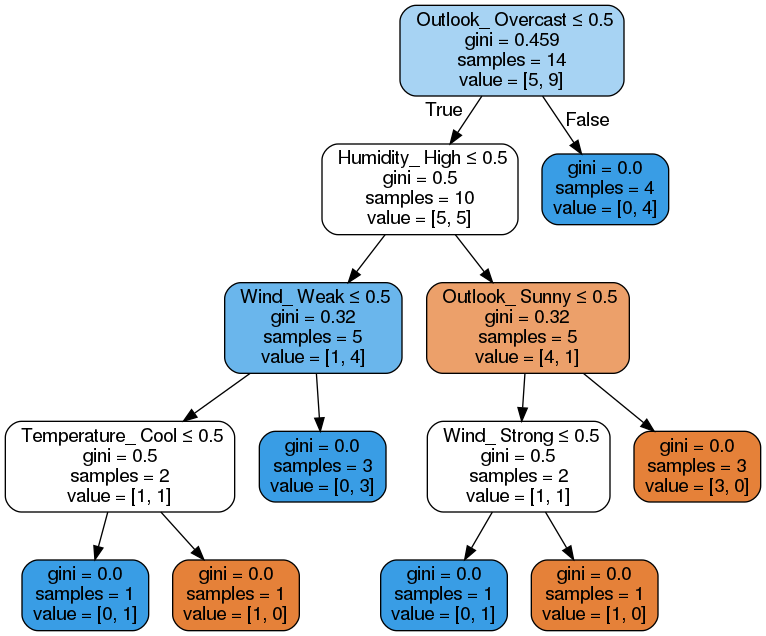

In [16]:
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, 
               rounded=True, special_characters=True, feature_names=col_names_list)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [17]:
sel_features.head(14)

,Outlook_ Overcast,Outlook_ Rain,Outlook_ Sunny,Temperature_ Cool,Temperature_ Hot,Temperature_ Mild,Humidity_ High,Humidity_ Normal,Wind_ Strong,Wind_ Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


In [18]:
toy_df_dummies.head(14)

,Day,PlayTennis,Outlook_ Overcast,Outlook_ Rain,Outlook_ Sunny,Temperature_ Cool,Temperature_ Hot,Temperature_ Mild,Humidity_ High,Humidity_ Normal,Wind_ Strong,Wind_ Weak
0,D1,0,0,0,1,0,1,0,1,0,0,1
1,D2,0,0,0,1,0,1,0,1,0,1,0
2,D3,1,1,0,0,0,1,0,1,0,0,1
3,D4,1,0,1,0,0,0,1,1,0,0,1
4,D5,1,0,1,0,1,0,0,0,1,0,1
5,D6,0,0,1,0,1,0,0,0,1,1,0
6,D7,1,1,0,0,1,0,0,0,1,1,0
7,D8,0,0,0,1,0,0,1,1,0,0,1
8,D9,1,0,0,1,1,0,0,0,1,0,1
9,D10,1,0,1,0,0,0,1,0,1,0,1


In [19]:
toy_df_dummies_overcast0 = toy_df_dummies[toy_df_dummies[' Outlook_ Overcast']==0]
print ("shape of new dataframe where overcast is 0: ", toy_df_dummies_overcast0.shape)

shape of new dataframe where overcast is 0:  (10, 12)


In [20]:
toy_df_dummies_overcast0.head(10)

,Day,PlayTennis,Outlook_ Overcast,Outlook_ Rain,Outlook_ Sunny,Temperature_ Cool,Temperature_ Hot,Temperature_ Mild,Humidity_ High,Humidity_ Normal,Wind_ Strong,Wind_ Weak
0,D1,0,0,0,1,0,1,0,1,0,0,1
1,D2,0,0,0,1,0,1,0,1,0,1,0
3,D4,1,0,1,0,0,0,1,1,0,0,1
4,D5,1,0,1,0,1,0,0,0,1,0,1
5,D6,0,0,1,0,1,0,0,0,1,1,0
7,D8,0,0,0,1,0,0,1,1,0,0,1
8,D9,1,0,0,1,1,0,0,0,1,0,1
9,D10,1,0,1,0,0,0,1,0,1,0,1
10,D11,1,0,0,1,0,0,1,0,1,1,0
13,D14,0,0,1,0,0,0,1,1,0,1,0


In [21]:
toy_df_dummies_overcast0_Hum_High = toy_df_dummies_overcast0[toy_df_dummies_overcast0[' Humidity_ High']==0]
print ("shape of new data frame where overcast 0, humidity is high: ", toy_df_dummies_overcast0_Hum_High.shape)

shape of new data frame where overcast 0, humidity is high:  (5, 12)


In [22]:
toy_df_dummies_overcast0_Hum_High.head(5)

,Day,PlayTennis,Outlook_ Overcast,Outlook_ Rain,Outlook_ Sunny,Temperature_ Cool,Temperature_ Hot,Temperature_ Mild,Humidity_ High,Humidity_ Normal,Wind_ Strong,Wind_ Weak
4,D5,1,0,1,0,1,0,0,0,1,0,1
5,D6,0,0,1,0,1,0,0,0,1,1,0
8,D9,1,0,0,1,1,0,0,0,1,0,1
9,D10,1,0,1,0,0,0,1,0,1,0,1
10,D11,1,0,0,1,0,0,1,0,1,1,0
